In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


In [61]:
df = pd.read_csv("df_combined_csv.csv")

C:\Users\ashfaq.ahamed\AppData\Local\Temp\ipykernel_22756\3574734319.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("df_combined_csv.csv")


In [62]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
939411,2024-11,YISHUN,5 ROOM,432C,YISHUN AVE 1,10 TO 12,112.0,Improved,2015,688000.0,90 years
939412,2024-11,YISHUN,5 ROOM,350,YISHUN AVE 11,10 TO 12,121.0,Improved,1988,710000.0,62 years 11 months
939413,2024-11,YISHUN,5 ROOM,415,YISHUN AVE 11,04 TO 06,121.0,Improved,1993,700000.0,67 years 04 months
939414,2024-11,YISHUN,5 ROOM,602,YISHUN ST 61,01 TO 03,121.0,Improved,1987,620000.0,61 years 08 months


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 939416 entries, 0 to 939415
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                939416 non-null  object 
 1   town                 939416 non-null  object 
 2   flat_type            939416 non-null  object 
 3   block                939416 non-null  object 
 4   street_name          939416 non-null  object 
 5   storey_range         939416 non-null  object 
 6   floor_area_sqm       939416 non-null  float64
 7   flat_model           939416 non-null  object 
 8   lease_commence_date  939416 non-null  int64  
 9   resale_price         939416 non-null  float64
 10  remaining_lease      230366 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 78.8+ MB


In [64]:
df['month'] =  df['month'].astype(str) + '-01'

In [65]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
939411,2024-11-01,YISHUN,5 ROOM,432C,YISHUN AVE 1,10 TO 12,112.0,Improved,2015,688000.0,90 years
939412,2024-11-01,YISHUN,5 ROOM,350,YISHUN AVE 11,10 TO 12,121.0,Improved,1988,710000.0,62 years 11 months
939413,2024-11-01,YISHUN,5 ROOM,415,YISHUN AVE 11,04 TO 06,121.0,Improved,1993,700000.0,67 years 04 months
939414,2024-11-01,YISHUN,5 ROOM,602,YISHUN ST 61,01 TO 03,121.0,Improved,1987,620000.0,61 years 08 months


In [66]:
df['month'] = pd.to_datetime(df.month, format='%Y-%m-%d')

In [67]:
df['year'] = df['month'].dt.year

In [68]:
df.head(50)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year
0,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN,1990
1,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN,1990
2,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN,1990
3,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN,1990
4,1990-01-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN,1990
5,1990-01-01,ANG MO KIO,3 ROOM,211,ANG MO KIO AVE 3,01 TO 03,67.0,NEW GENERATION,1977,46000.0,NaN,1990
6,1990-01-01,ANG MO KIO,3 ROOM,202,ANG MO KIO AVE 3,07 TO 09,67.0,NEW GENERATION,1977,42000.0,NaN,1990
7,1990-01-01,ANG MO KIO,3 ROOM,235,ANG MO KIO AVE 3,10 TO 12,67.0,NEW GENERATION,1977,38000.0,NaN,1990
8,1990-01-01,ANG MO KIO,3 ROOM,235,ANG MO KIO AVE 3,04 TO 06,67.0,NEW GENERATION,1977,40000.0,NaN,1990
9,1990-01-01,ANG MO KIO,3 ROOM,232,ANG MO KIO AVE 3,01 TO 03,67.0,NEW GENERATION,1977,47000.0,NaN,1990


In [69]:
df['remaining_lease'] = df['remaining_lease'].fillna(99-(df['year']-df['lease_commence_date']))

In [70]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year
0,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,86,1990
1,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,86,1990
2,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,86,1990
3,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,86,1990
4,1990-01-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,85,1990
...,...,...,...,...,...,...,...,...,...,...,...,...
939411,2024-11-01,YISHUN,5 ROOM,432C,YISHUN AVE 1,10 TO 12,112.0,Improved,2015,688000.0,90 years,2024
939412,2024-11-01,YISHUN,5 ROOM,350,YISHUN AVE 11,10 TO 12,121.0,Improved,1988,710000.0,62 years 11 months,2024
939413,2024-11-01,YISHUN,5 ROOM,415,YISHUN AVE 11,04 TO 06,121.0,Improved,1993,700000.0,67 years 04 months,2024
939414,2024-11-01,YISHUN,5 ROOM,602,YISHUN ST 61,01 TO 03,121.0,Improved,1987,620000.0,61 years 08 months,2024


In [71]:
df['storey_range'].unique()

array(['10 TO 12', '04 TO 06', '07 TO 09', '01 TO 03', '13 TO 15',
       '19 TO 21', '16 TO 18', '25 TO 27', '22 TO 24', '28 TO 30',
       '31 TO 33', '40 TO 42', '37 TO 39', '34 TO 36', '46 TO 48',
       '43 TO 45', '49 TO 51', '06 TO 10', '01 TO 05', '11 TO 15',
       '16 TO 20', '21 TO 25', '26 TO 30', '36 TO 40', '31 TO 35'],
      dtype=object)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 939416 entries, 0 to 939415
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   month                939416 non-null  datetime64[ns]
 1   town                 939416 non-null  object        
 2   flat_type            939416 non-null  object        
 3   block                939416 non-null  object        
 4   street_name          939416 non-null  object        
 5   storey_range         939416 non-null  object        
 6   floor_area_sqm       939416 non-null  float64       
 7   flat_model           939416 non-null  object        
 8   lease_commence_date  939416 non-null  int64         
 9   resale_price         939416 non-null  float64       
 10  remaining_lease      939416 non-null  object        
 11  year                 939416 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(7)
memory u

In [73]:
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
year                   0
dtype: int64

In [74]:
df['remaining_lease'] = df['remaining_lease'].apply(lambda x : str(x))

In [75]:
df['remaining_lease_yrs'] = df['remaining_lease'].apply(lambda x : x[:2])

In [76]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,remaining_lease_yrs
0,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,86,1990,86
1,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,86,1990,86
2,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,86,1990,86
3,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,86,1990,86
4,1990-01-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,85,1990,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...
939411,2024-11-01,YISHUN,5 ROOM,432C,YISHUN AVE 1,10 TO 12,112.0,Improved,2015,688000.0,90 years,2024,90
939412,2024-11-01,YISHUN,5 ROOM,350,YISHUN AVE 11,10 TO 12,121.0,Improved,1988,710000.0,62 years 11 months,2024,62
939413,2024-11-01,YISHUN,5 ROOM,415,YISHUN AVE 11,04 TO 06,121.0,Improved,1993,700000.0,67 years 04 months,2024,67
939414,2024-11-01,YISHUN,5 ROOM,602,YISHUN ST 61,01 TO 03,121.0,Improved,1987,620000.0,61 years 08 months,2024,61


In [77]:
df = df.drop(["month","remaining_lease","remaining_lease_yrs"], axis='columns')

In [78]:
df['resale_price'] = df.pop('resale_price')

In [79]:
df

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,year,resale_price
0,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,1990,9000.0
1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,1990,6000.0
2,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,1990,8000.0
3,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,1990,6000.0
4,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,1990,47200.0
...,...,...,...,...,...,...,...,...,...,...
939411,YISHUN,5 ROOM,432C,YISHUN AVE 1,10 TO 12,112.0,Improved,2015,2024,688000.0
939412,YISHUN,5 ROOM,350,YISHUN AVE 11,10 TO 12,121.0,Improved,1988,2024,710000.0
939413,YISHUN,5 ROOM,415,YISHUN AVE 11,04 TO 06,121.0,Improved,1993,2024,700000.0
939414,YISHUN,5 ROOM,602,YISHUN ST 61,01 TO 03,121.0,Improved,1987,2024,620000.0


In [80]:
df['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION', 'MULTI-GENERATION'], dtype=object)

In [81]:
df['floor_area_sqm'].unique()

array([ 31. ,  73. ,  67. ,  82. ,  74. ,  88. ,  89. ,  83. ,  68. ,
        75. ,  81. ,  91. ,  92. ,  97. ,  90. ,  98. ,  99. , 100. ,
        93. , 103. , 119. , 120. , 118. , 121. , 135. , 117. ,  45. ,
        65. ,  59. ,  70. ,  76. ,  84. , 104. , 105. , 125. , 132. ,
       139. , 123. , 143. , 151. ,  69. , 106. , 107. , 116. , 149. ,
       141. , 146. , 148. , 145. , 154. , 150. ,  29. ,  51. ,  61. ,
        63. ,  64. ,  72. ,  58. ,  66. ,  60. ,  53. ,  54. ,  56. ,
        77. , 133. , 131. , 115. ,  43. ,  38. ,  41. ,  85. , 111. ,
       101. , 112. , 137. , 127. , 147. , 163. ,  50. ,  40. ,  60.3,
        62. ,  55. ,  57. ,  52. ,  63.1, 102. ,  83.1, 126. , 140. ,
       142. ,  71. , 108. , 144. ,  96. , 114. , 157. , 152. , 155. ,
        87. , 109. , 110. ,  94. , 134. , 122. , 128. ,  78. ,  46. ,
        42. ,  49. ,  47. ,  86. , 156. ,  79. ,  80. , 124. ,  28. ,
       113. ,  95. , 160. , 136. ,  48. , 138. , 161. ,  39. , 130. ,
       159. , 206. ,

In [82]:
df['street_name'].unique()

array(['ANG MO KIO AVE 1', 'ANG MO KIO AVE 3', 'ANG MO KIO AVE 4',
       'ANG MO KIO AVE 10', 'ANG MO KIO AVE 5', 'ANG MO KIO AVE 8',
       'ANG MO KIO AVE 6', 'ANG MO KIO AVE 9', 'ANG MO KIO AVE 2',
       'BEDOK RESERVOIR RD', 'BEDOK NTH ST 3', 'BEDOK STH RD',
       'NEW UPP CHANGI RD', 'BEDOK NTH RD', 'BEDOK STH AVE 1',
       'CHAI CHEE RD', 'CHAI CHEE DR', 'BEDOK NTH AVE 4',
       'BEDOK STH AVE 3', 'BEDOK STH AVE 2', 'BEDOK NTH ST 2',
       'BEDOK NTH ST 4', 'BEDOK NTH AVE 2', 'BEDOK NTH AVE 3',
       'BEDOK NTH AVE 1', 'BEDOK NTH ST 1', 'CHAI CHEE ST', 'SIN MING RD',
       'SHUNFU RD', 'BT BATOK ST 11', 'BT BATOK WEST AVE 8',
       'BT BATOK WEST AVE 6', 'BT BATOK ST 21', 'BT BATOK EAST AVE 5',
       'BT BATOK EAST AVE 4', 'HILLVIEW AVE', 'BT BATOK CTRL',
       'BT BATOK ST 31', 'BT BATOK EAST AVE 3', 'TAMAN HO SWEE',
       'TELOK BLANGAH CRES', 'BEO CRES', 'TELOK BLANGAH DR', 'DEPOT RD',
       'TELOK BLANGAH RISE', 'JLN BT MERAH', 'HENDERSON RD', 'INDUS RD',
       

In [83]:
df['block'].nunique()

2721

In [84]:
df['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI',
       'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'QUEENSTOWN', 'SENGKANG',
       'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN',
       'LIM CHU KANG', 'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS',
       'PUNGGOL'], dtype=object)

In [85]:
temp_df = df.query('town == \'YISHUN\'')

In [86]:
df.query('town == \'YISHUN\'')['street_name'].unique()

array(['YISHUN RING RD', 'YISHUN AVE 5', 'YISHUN ST 72', 'YISHUN ST 11',
       'YISHUN ST 21', 'YISHUN ST 22', 'YISHUN AVE 3', 'YISHUN AVE 6',
       'YISHUN AVE 9', 'YISHUN ST 71', 'YISHUN AVE 4', 'YISHUN ST 61',
       'YISHUN AVE 2', 'YISHUN ST 81', 'YISHUN AVE 7', 'YISHUN AVE 11',
       'YISHUN CTRL', 'YISHUN CTRL 1', 'YISHUN ST 20', 'YISHUN ST 41',
       'YISHUN ST 31', 'YISHUN AVE 1', 'YISHUN ST 51', 'YISHUN ST 43'],
      dtype=object)

In [87]:
town = 'YISHUN'

val = town +"st"

val = df.query(f'town == \'{town}\'')['street_name'].unique()

In [88]:
col = ['flat_type','block','street_name','storey_range','floor_area_sqm','flat_model']

In [89]:
town_params = {}
for t in df['town'].unique():
  for colm in col:
    val = t+"_"+colm
    town_params[val] = df.query(f'town == \'{t}\'')[colm].unique()

In [90]:
town_params['ANG MO KIO_block']

array(['309', '216', '211', '202', '235', '232', '308', '220', '219',
       '247', '320', '252', '223', '230', '329', '313', '117', '110',
       '343', '345', '346', '121', '129', '130', '128', '127', '126',
       '403', '404', '405', '417', '418', '419', '441', '442', '443',
       '444', '450', '435', '433', '434', '424', '425', '466', '471',
       '474', '570', '586', '455', '465', '463', '564', '560', '558',
       '559', '538', '534', '601', '603', '604', '608', '611', '505',
       '503', '610', '607', '524', '513', '643', '542', '548', '550',
       '639', '637', '330', '333', '156', '152', '178', '180', '209',
       '231', '254', '103', '105', '344', '324', '120', '124', '414',
       '438', '427', '428', '473', '573', '585', '456', '544', '640',
       '638', '646', '150', '179', '336', '335', '401', '439', '430',
       '460', '459', '716', '545', '620', '622', '259', '101', '170',
       '212', '201', '307', '255', '248', '256', '328', '301', '118',
       '348', '447',

In [91]:
df

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,year,resale_price
0,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,1990,9000.0
1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,1990,6000.0
2,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,1990,8000.0
3,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,1990,6000.0
4,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,1990,47200.0
...,...,...,...,...,...,...,...,...,...,...
939411,YISHUN,5 ROOM,432C,YISHUN AVE 1,10 TO 12,112.0,Improved,2015,2024,688000.0
939412,YISHUN,5 ROOM,350,YISHUN AVE 11,10 TO 12,121.0,Improved,1988,2024,710000.0
939413,YISHUN,5 ROOM,415,YISHUN AVE 11,04 TO 06,121.0,Improved,1993,2024,700000.0
939414,YISHUN,5 ROOM,602,YISHUN ST 61,01 TO 03,121.0,Improved,1987,2024,620000.0


In [ ]:
#encoding data
le = LabelEncoder()
le_col = ['town' , 'block', 'street_name']

label_encoders = {}
le_col_val = {}

for col in le_col:
  le = LabelEncoder()
  le.fit(df[col])

  le_col_val[col] = dict(zip(le.classes_, le.transform(le.classes_)))

  label_encoders[col] = le#save the model

  df[col] = le.transform(df[col])
  print(label_encoders[col].classes_)
  #print(le_col_val)


oe_col = ['flat_type', 'storey_range', 'flat_model', 'lease_commence_date', 'year']
ordinal_encoders = {}
mapping = {}

for col in oe_col:

  oe = OrdinalEncoder()

  oe.fit(df[[col]])

  ordinal_encoders[col] = oe #save the model

  df[col] = oe.transform(df[[col]])
  categories = oe.categories_[0]  # Get categories for the first column

  mapping[col] = {value: idx for idx, value in enumerate(categories)}
  #print(mapping[col])

['ANG MO KIO' 'BEDOK' 'BISHAN' 'BUKIT BATOK' 'BUKIT MERAH' 'BUKIT PANJANG'
 'BUKIT TIMAH' 'CENTRAL AREA' 'CHOA CHU KANG' 'CLEMENTI' 'GEYLANG'
 'HOUGANG' 'JURONG EAST' 'JURONG WEST' 'KALLANG/WHAMPOA' 'LIM CHU KANG'
 'MARINE PARADE' 'PASIR RIS' 'PUNGGOL' 'QUEENSTOWN' 'SEMBAWANG' 'SENGKANG'
 'SERANGOON' 'TAMPINES' 'TOA PAYOH' 'WOODLANDS' 'YISHUN']
['1' '10' '100' ... '99C' '9A' '9B']
['ADMIRALTY DR' 'ADMIRALTY LINK' 'AH HOOD RD' 'ALEXANDRA RD'
 'ALJUNIED AVE 2' 'ALJUNIED CRES' 'ALJUNIED RD' 'ANCHORVALE CRES'
 'ANCHORVALE DR' 'ANCHORVALE LANE' 'ANCHORVALE LINK' 'ANCHORVALE RD'
 'ANCHORVALE ST' 'ANG MO KIO AVE 1' 'ANG MO KIO AVE 10' 'ANG MO KIO AVE 2'
 'ANG MO KIO AVE 3' 'ANG MO KIO AVE 4' 'ANG MO KIO AVE 5'
 'ANG MO KIO AVE 6' 'ANG MO KIO AVE 8' 'ANG MO KIO AVE 9'
 'ANG MO KIO ST 11' 'ANG MO KIO ST 21' 'ANG MO KIO ST 31'
 'ANG MO KIO ST 32' 'ANG MO KIO ST 44' 'ANG MO KIO ST 51'
 'ANG MO KIO ST 52' 'ANG MO KIO ST 61' 'BAIN ST' 'BALAM RD' 'BANGKIT RD'
 'BEACH RD' 'BEDOK CTRL' 'BEDOK NTH AVE 

In [93]:
df.describe()

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,year,resale_price
count,939416.000000,939416.000000,939416.000000,939416.000000,939416.000000,939416.000000,939416.000000,939416.000000,939416.000000,9.394160e+05
mean,13.662459,3.014731,1124.448550,288.168035,3.417216,95.685484,15.716753,1988.404499,2006.401167,3.246928e+05
std,8.790581,0.949102,777.800601,182.780109,2.673369,25.804644,6.659469,10.791739,9.478194,1.741473e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,0.000000,1966.000000,1990.000000,5.000000e+03
25%,5.000000,2.000000,432.000000,124.000000,2.000000,73.000000,9.000000,1981.000000,1999.000000,1.950000e+05
50%,13.000000,3.000000,1067.000000,280.000000,4.000000,93.000000,16.000000,1986.000000,2005.000000,3.000000e+05
75%,23.000000,4.000000,1764.000000,464.000000,5.000000,113.000000,21.000000,1996.000000,2014.000000,4.200000e+05
max,26.000000,7.000000,2720.000000,587.000000,24.000000,366.700000,33.000000,2021.000000,2024.000000,1.588000e+06


Covariance Matrix:
                              town     flat_type         block    street_name  \
town                    77.274319      1.140200  5.830722e+02    1198.777461   
flat_type                1.140200      0.900794  5.891446e+01      19.962899   
block                  583.072238     58.914460  6.049738e+05   18977.334572   
street_name           1198.777461     19.962899  1.897733e+04   33408.568083   
storey_range            -1.119940      0.187221 -9.600919e+00     -29.910245   
floor_area_sqm          29.991370     23.329035  1.659425e+03     606.396898   
flat_model              -5.975788     -2.272246  1.102001e+01    -116.853714   
lease_commence_date     20.153084      4.105358  1.235452e+03     296.762863   
year                     6.020803      0.897574  3.734046e+02      33.170629   
resale_price         88289.174805  95712.769737  5.469931e+06  974591.973129   

                      storey_range  floor_area_sqm     flat_model  \
town                     -1.11

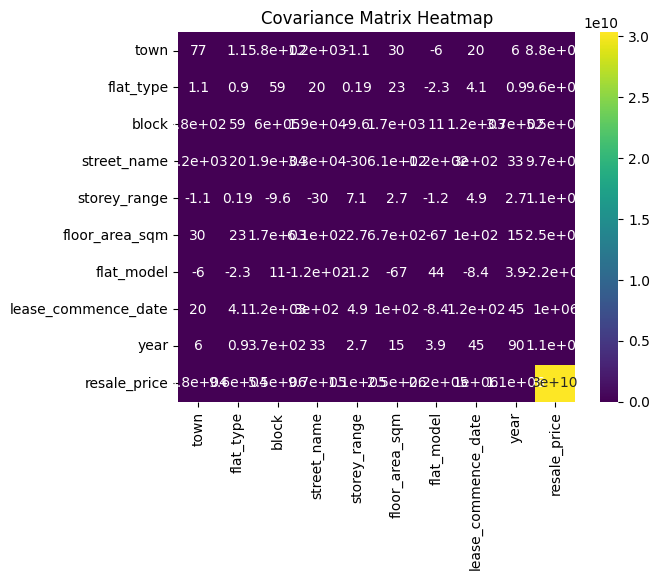

In [94]:
#cov_matrix = df.drop(['resale_price'], axis=1).cov()

cov_matrix = df.cov()

# Display covariance matrix
print("Covariance Matrix:\n", cov_matrix)

# Heatmap for visualization
sns.heatmap(cov_matrix, annot=True, cmap='viridis')
plt.title('Covariance Matrix Heatmap')
plt.show()

<Axes: ylabel='resale_price'>

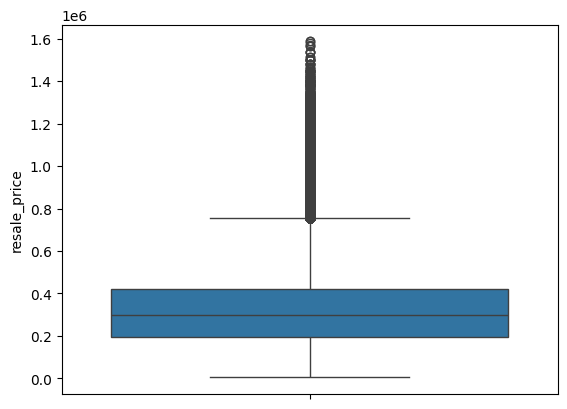

In [95]:
sns.boxplot(y='resale_price', data=df)

In [96]:
high_resale = df.query('resale_price > 900000')
print(high_resale['lease_commence_date'].unique())
print(high_resale['floor_area_sqm'].unique())
print(high_resale['flat_type'].unique())
print(high_resale['year'].unique())

[2006 1989 2001 2011 2012 1988 1974 1972 1997 1987 2013 1992 1995 2005
 1983 1977 1975 2008 1984 1996 1993 1978 1968 1985 2009 1990 1979 1986
 1998 1999 2003 1994 1981 1980 2015 2002 2000 2016 2007 2014 2018 1973
 2019 2017 2010 2004 1991 2020 1982 1976]
[110.  174.  115.   96.   97.  106.  117.  146.   95.   93.  107.  105.
 147.  280.  125.  149.  114.  160.  241.  133.  154.  126.   94.  152.
 120.  148.  163.  142.  118.  119.  124.  121.  145.  157.  122.  113.
 153.  108.  140.  139.  111.  131.  162.  132.  150.  116.  112.  144.
 143.  169.  259.  249.  165.  155.  141.  166.  151.  266.  199.  156.
 180.  130.  178.  161.  136.  109.  177.  182.   92.  185.  129.  137.
 237.  158.  175.   87.   99.  186.  187.  170.  104.  134.  243.   91.
 222.  167.  123.   98.  210.   83.  190.  189.  127.  135.   89.  159.
 164.  100.  192.  181.  138.   90.  179.   88.  176.  188.  173.  171.
 101.  100.2 128.   85.  184.   86.  172.  208.   80.   81.  189.4 103.
 102.  366.7 168.   82.  

In [97]:
high_resale = df.query('resale_price > 500000')
print(high_resale['lease_commence_date'].unique())
print(high_resale['floor_area_sqm'].unique())
print(high_resale['flat_type'].unique())
print(high_resale['year'].unique())

[1987 1990 1995 1989 1986 1988 1985 1992 1993 1984 1977 1975 1976 1994
 1996 1983 1978 1991 1972 1968 1982 1997 1981 1979 1974 1980 1998 1999
 2001 2003 2005 2002 2000 2006 2004 1973 1970 2008 1971 2007 1967 1969
 2009 2012 2010 2011 2013 2015 2014 2016 2018 2017 2019 2020]
[163.  160.  142.  150.  144.  146.  151.  170.  165.  154.  171.  179.
 149.  174.  186.  148.  181.  155.  164.  243.  169.  147.  143.  121.
 131.  126.  152.  145.  120.  157.  138.  187.  123.  128.  153.  133.
 139.  141.  156.  136.  166.  125.  127.  132.  161.  122.  184.  137.
 119.  140.  177.  135.  199.  159.  158.  178.  117.  130.  175.  189.
 102.  172.  173.  118.  129.  134.  162.  115.  176.  222.  114.  168.
 108.  124.  215.  261.  167.  152.4  97.  250.  195.  188.   90.  225.
 307.  182.   87.  112.  100.   99.  192.  190.  207.  246.  259.  266.
 104.  180.  297.  241.  280.  198.  210.  116.  110.  111.  109.  101.
  82.  105.   96.  113.   91.   92.   95.   83.  103.  106.   85.  107.
  88.

<Axes: xlabel='storey_range', ylabel='resale_price'>

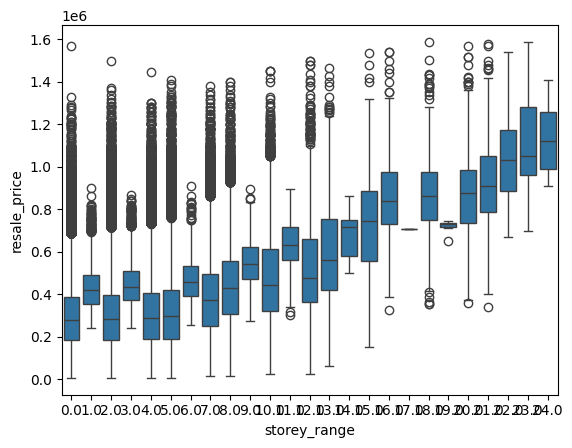

In [98]:
sns.boxplot(x='storey_range',y='resale_price', data=df)

<Axes: xlabel='floor_area_sqm', ylabel='resale_price'>

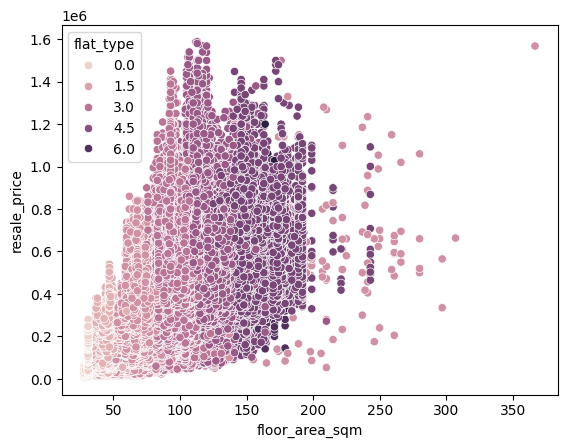

In [99]:
sns.scatterplot(data=df, x="floor_area_sqm", y="resale_price", hue="flat_type")

<Axes: xlabel='floor_area_sqm', ylabel='resale_price'>

c:\Users\ashfaq.ahamed\Documents\projects1\HDB\Lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
c:\Users\ashfaq.ahamed\Documents\projects1\HDB\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


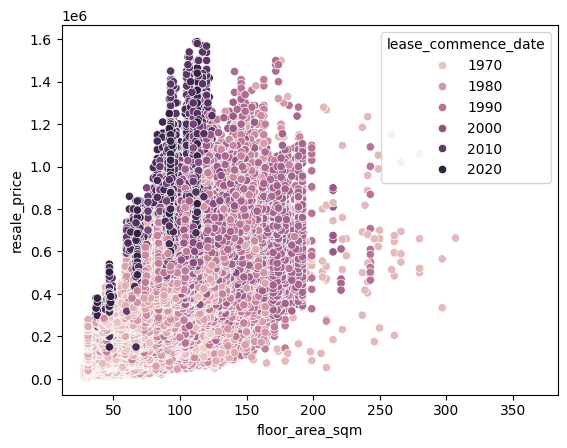

In [100]:

sns.scatterplot(data=df, x="floor_area_sqm", y="resale_price", hue="lease_commence_date")

<Axes: xlabel='year', ylabel='resale_price'>

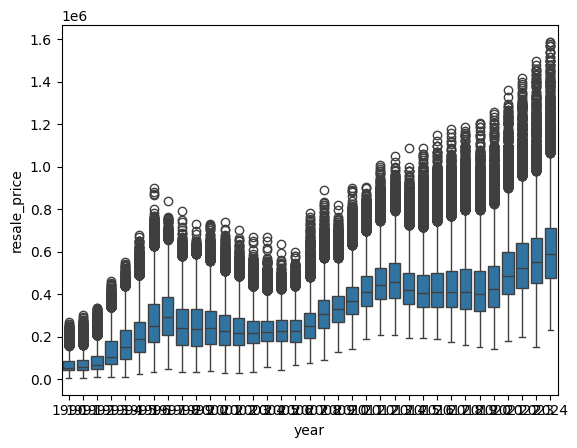

In [101]:
sns.boxplot(x='year',y='resale_price', data=df)

In [102]:
df

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,year,resale_price
0,0,0.0,832,13,5.0,31.0,7.0,1977,1990,9000.0
1,0,0.0,832,13,2.0,31.0,7.0,1977,1990,6000.0
2,0,0.0,832,13,5.0,31.0,7.0,1977,1990,8000.0
3,0,0.0,832,13,4.0,31.0,7.0,1977,1990,6000.0
4,0,2.0,449,13,2.0,73.0,20.0,1976,1990,47200.0
...,...,...,...,...,...,...,...,...,...,...
939411,26,4.0,1208,556,5.0,112.0,9.0,2015,2024,688000.0
939412,26,4.0,998,557,5.0,121.0,9.0,1988,2024,710000.0
939413,26,4.0,1155,557,2.0,121.0,9.0,1993,2024,700000.0
939414,26,4.0,1742,576,0.0,121.0,9.0,1987,2024,620000.0


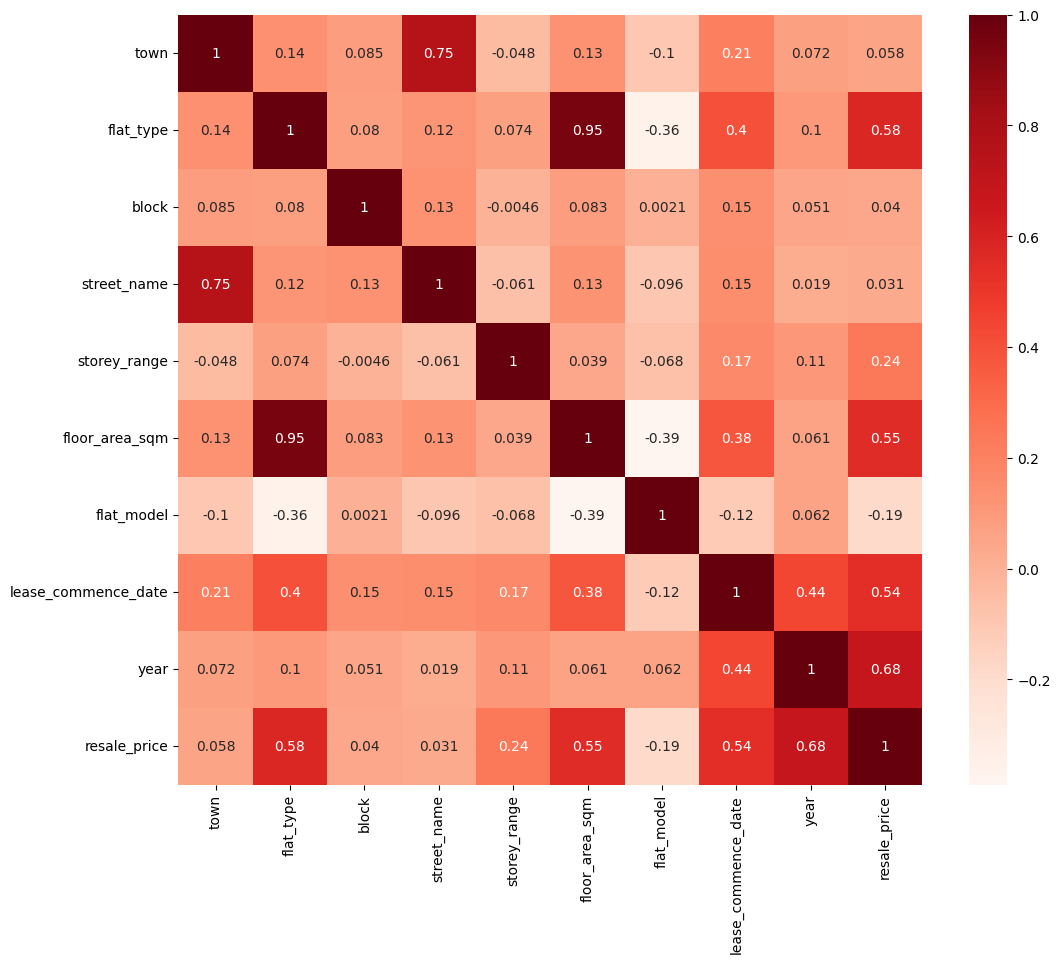

In [103]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

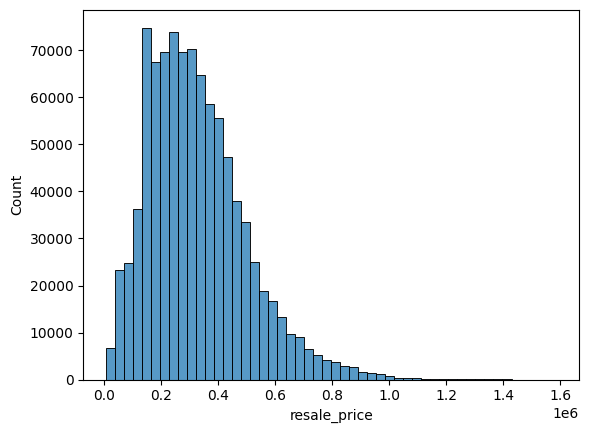

In [104]:
sns.histplot((df['resale_price']),bins=50);

In [105]:
scaler = MinMaxScaler()
#scaler2 = MinMaxScaler() #only for resale_price column
#input param = array-like of shape (n_samples, n_features)
df_for_scalar = df.drop('resale_price', axis = 'columns')

df_minmax_scaled = df.copy()

scaler.fit(df_for_scalar[df_for_scalar.columns])
#scaler2.fit(df[['resale_price']])

minmaxscaler = scaler

df_minmax_scaled[df_for_scalar.columns] = scaler.transform(df_for_scalar[df_for_scalar.columns])

#df_minmax_scaled['resale_price'] = scaler2.transform(df[['resale_price']])

# view normalized data
display(df_minmax_scaled)


,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,year,resale_price
0,0.0,0.000000,0.305882,0.022147,0.208333,0.008857,0.212121,0.200000,0.0,9000.0
1,0.0,0.000000,0.305882,0.022147,0.083333,0.008857,0.212121,0.200000,0.0,6000.0
2,0.0,0.000000,0.305882,0.022147,0.208333,0.008857,0.212121,0.200000,0.0,8000.0
3,0.0,0.000000,0.305882,0.022147,0.166667,0.008857,0.212121,0.200000,0.0,6000.0
4,0.0,0.285714,0.165074,0.022147,0.083333,0.132861,0.606061,0.181818,0.0,47200.0
...,...,...,...,...,...,...,...,...,...,...
939411,1.0,0.571429,0.444118,0.947189,0.208333,0.248007,0.272727,0.890909,1.0,688000.0
939412,1.0,0.571429,0.366912,0.948893,0.208333,0.274579,0.272727,0.400000,1.0,710000.0
939413,1.0,0.571429,0.424632,0.948893,0.083333,0.274579,0.272727,0.490909,1.0,700000.0
939414,1.0,0.571429,0.640441,0.981261,0.000000,0.274579,0.272727,0.381818,1.0,620000.0


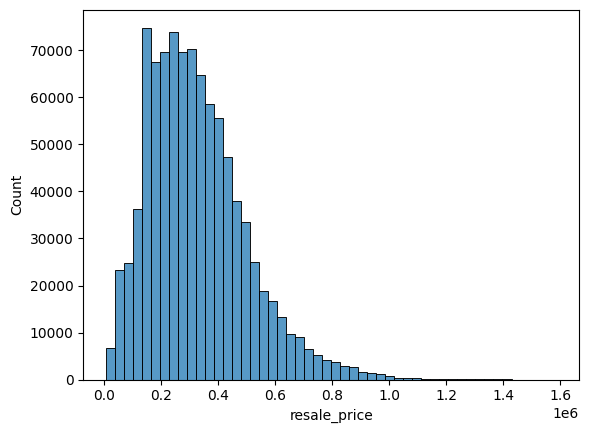

In [106]:
sns.histplot((df_minmax_scaled['resale_price']),bins=50);

In [107]:
cor_target = abs(cor["resale_price"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

flat_type              0.579083
floor_area_sqm         0.552323
lease_commence_date    0.541693
year                   0.682914
resale_price           1.000000
Name: resale_price, dtype: float64

In [108]:
df

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,year,resale_price
0,0,0.0,832,13,5.0,31.0,7.0,1977,1990,9000.0
1,0,0.0,832,13,2.0,31.0,7.0,1977,1990,6000.0
2,0,0.0,832,13,5.0,31.0,7.0,1977,1990,8000.0
3,0,0.0,832,13,4.0,31.0,7.0,1977,1990,6000.0
4,0,2.0,449,13,2.0,73.0,20.0,1976,1990,47200.0
...,...,...,...,...,...,...,...,...,...,...
939411,26,4.0,1208,556,5.0,112.0,9.0,2015,2024,688000.0
939412,26,4.0,998,557,5.0,121.0,9.0,1988,2024,710000.0
939413,26,4.0,1155,557,2.0,121.0,9.0,1993,2024,700000.0
939414,26,4.0,1742,576,0.0,121.0,9.0,1987,2024,620000.0


In [109]:
df_minmax_scaled.skew().sort_values(ascending=False)

storey_range           1.113597
resale_price           0.969779
lease_commence_date    0.660218
flat_type              0.395083
floor_area_sqm         0.366318
year                   0.289503
block                  0.257246
flat_model             0.206821
street_name            0.023196
town                  -0.087993
dtype: float64

In [110]:
df.skew().sort_values(ascending=False)

storey_range           1.113597
resale_price           0.969779
lease_commence_date    0.660218
flat_type              0.395083
floor_area_sqm         0.366318
year                   0.289503
block                  0.257246
flat_model             0.206821
street_name            0.023196
town                  -0.087993
dtype: float64

## **model training**

In [111]:

X = df_minmax_scaled.drop('resale_price', axis = 1)
Y = df_minmax_scaled['resale_price']

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.33, random_state = 43)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(629408, 9)
(310008, 9)
(629408,)
(310008,)


In [112]:
from sklearn import metrics
# Model creation, prediction

def training(model,X_train,y_train,X_test,y_test):

  model.fit(X_train, y_train)
  #print('Coefficients: \n', model.coef_)
  train_y_pred = model.predict(X_train)
  test_y_pred = model.predict(X_test)


  print('Test data metrics')
  print('MAE:', metrics.mean_absolute_error(y_test, test_y_pred))
  print('MSE:', metrics.mean_squared_error(y_test, test_y_pred))
  print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, test_y_pred)))
  print('R2:',metrics.explained_variance_score(y_test, test_y_pred))

  print('\nTrain data metrics')
  print('MAE:', metrics.mean_absolute_error(y_train, train_y_pred))
  print('MSE:', metrics.mean_squared_error(y_train, train_y_pred))
  print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, train_y_pred)))
  print('R2:',metrics.explained_variance_score(y_train, train_y_pred))



In [113]:
'''
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 5, random_state = 18)

training(rf,X_train, Y_train,X_test,Y_test)
'''

"\nfrom sklearn.ensemble import RandomForestRegressor\n\nrf = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 5, random_state = 18)\n\ntraining(rf,X_train, Y_train,X_test,Y_test)\n"

In [114]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

training(lm,X_train, Y_train,X_test,Y_test)

Test data metrics
MAE: 62290.51567761006
MSE: 7150874807.740582
RMSE: 84562.84531483424
R2: 0.7649153950678783

Train data metrics
MAE: 62120.0891184212
MSE: 7105248217.479654
RMSE: 84292.63442009423
R2: 0.7653669122332072


In [115]:
print('Coefficients: \n', lm.coef_) #equation

Coefficients: 
 [-35991.38487523 288775.20171561 -22175.46812375   5113.28613671
 208869.41578217 609217.95769153 -22117.79605874  72369.94727367
 376146.83311853]


In [116]:

from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=2)

training(dt,X_train, Y_train,X_test,Y_test)

Test data metrics
MAE: 79194.64060633772
MSE: 11375072291.594103
RMSE: 106653.98394618976
R2: 0.6260457541151221

Train data metrics
MAE: 78960.52721733658
MSE: 11301285866.1575
RMSE: 106307.50616093625
R2: 0.6268032421459396


In [117]:
dt = DecisionTreeRegressor(max_depth=5)

training(dt,X_train, Y_train,X_test,Y_test)

Test data metrics
MAE: 50879.1289129848
MSE: 5617999745.5137825
RMSE: 74953.3171081426
R2: 0.8153085316439359

Train data metrics
MAE: 50790.314186343385
MSE: 5595225099.338587
RMSE: 74801.23728481092
R2: 0.8152316567099814


In [118]:
import pickle
with open('dt_rg.pkl', 'wb') as f:
    pickle.dump(dt, f)

with open('scaler_rg.pkl', 'wb') as f:
    pickle.dump(minmaxscaler, f)

with open('le_rg.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)

with open('oe_rg.pkl', 'wb') as f:
    pickle.dump(ordinal_encoders, f)

#column values
with open('le_col_val_rg.pkl', 'wb') as f:
    pickle.dump(le_col_val, f)

with open('oe_col_val_rg.pkl', 'wb') as f:
    pickle.dump(mapping, f)